In [94]:
from keras.datasets import mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [95]:
print(X_train[1].shape)

(28, 28)


In [96]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [97]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


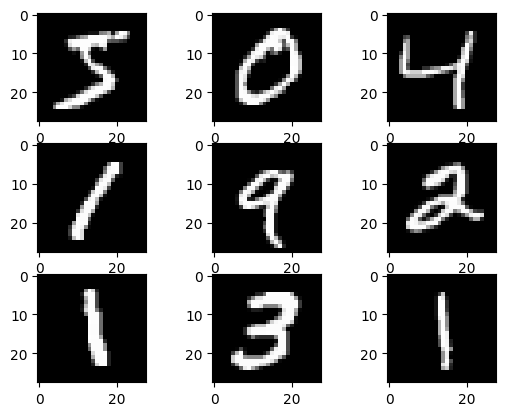

In [98]:
for i in range(9):
 plt.subplot(330 + 1 + i)
 plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [51]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) #so that it can be formatted in a way that machine can understand
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [52]:

print(X_train.shape)
print(X_test.shape)

print(X_train[0])

(60000, 784)
(10000, 784)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 

In [54]:
#to normalise the pixel values
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[0])

In [56]:
print("Class label of first image :", y_train[0])

Class label of first image : 5


In [57]:
#transforming int to binary vector(one hot)
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [58]:
print("After converting the output into a vector : ",Y_train[0])

After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [74]:
from keras.models import Sequential#help to stack layers
from keras.layers import Dense, Activation,BatchNormalization#prevent overfitting
from tensorflow.keras.optimizers import Adam #improve the accuracy of neural net

In [103]:
model1 = Sequential()
model1.add(Activation('sigmoid'))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [100]:
model2 = Sequential()
model2.add(Dense(64, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [101]:
model3 = Sequential()
model3.add(Dense(64, input_shape=(784,)))
model3.add(Activation('sigmoid'))
model3.add(BatchNormalization())
model3.add(Dense(10))
model3.add(Activation('softmax'))

model3.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [102]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 activation_22 (Activation)  (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 10)                650       
                                                                 
 activation_23 (Activation)  (None, 10)                0         
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)         

In [89]:
model1.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
score1 = model1.evaluate(X_test, Y_test, verbose=0)
print("Model 1 Test Loss:", score1[0])
print("Model 1 Test Accuracy:", score1[1])

# Train and evaluate model2
model2.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
score2 = model2.evaluate(X_test, Y_test, verbose=0)
print("Model 2 Test Loss:", score2[0])
print("Model 2 Test Accuracy:", score2[1])

# Train and evaluate model3
model3.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))
score3 = model3.evaluate(X_test, Y_test, verbose=0)
print("Model 3 Test Loss:", score3[0])
print("Model 3 Test Accuracy:", score3[1])

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9706 - val_loss: 0.1234 - val_accuracy: 0.9633
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0981 - accuracy: 0.9735 - val_loss: 0.1184 - val_accuracy: 0.9647
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0913 - accuracy: 0.9754 - val_loss: 0.1132 - val_accuracy: 0.9667
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0853 - accuracy: 0.9770 - val_loss: 0.1097 - val_accuracy: 0.9670
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0799 - accuracy: 0.9782 - val_loss: 0.1073 - val_accuracy: 0.9676
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0750 - accuracy: 0.9797 - val_loss: 0.1053 - val_accuracy: 0.9682
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0699 - accuracy: 0.9816 - val_loss: 0.1014 - val_accuracy: 0.9692
Epoch 

313/313 [==============================] - 1s 1ms/step
[3.4330433e-12 4.5981343e-09 1.3622004e-10 1.9582063e-04 7.6008800e-12
 9.9978781e-01 2.3661354e-13 1.9288224e-11 3.7713261e-07 1.6030002e-05]
5


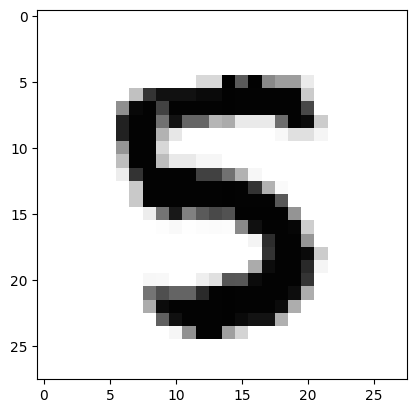

In [83]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model2.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

313/313 [==============================] - 1s 2ms/step
[1.0342291e-09 1.4828974e-10 7.1185596e-08 1.5386944e-05 2.0293561e-10
 9.9985886e-01 3.1435693e-08 4.4056250e-10 7.7840719e-05 4.7929436e-05]
5


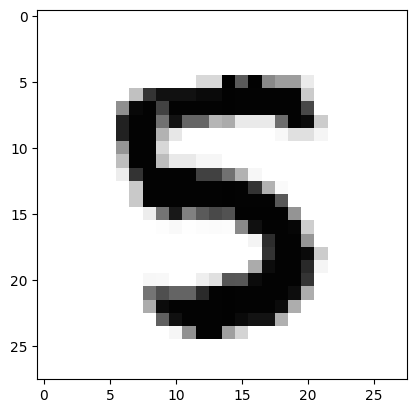

In [81]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model3.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))

313/313 [==============================] - 1s 2ms/step
[1.0342291e-09 1.4828974e-10 7.1185596e-08 1.5386944e-05 2.0293561e-10
 9.9985886e-01 3.1435693e-08 4.4056250e-10 7.7840719e-05 4.7929436e-05]
5


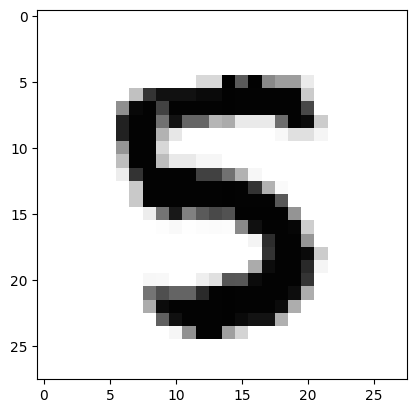

In [82]:
image_index = 120
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
pred = model3.predict(X_test)
print(pred[image_index])
print(np.argmax(pred[image_index]))